# Computational Social Science Project #3
Group number: 1

Group members: Benjamin Fields, Ernesto Gutierrez, and Nehal Eldeeb

Semester: Fall 2021

## 1. Introduction

In [50]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# Make sure to import other libraries that will be necessary for training models!

## 2. Data Pre-Processing & Cleaning

In [4]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv")

/Users/njila/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [6]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [7]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                'LICENSE_TERM_START_DATE',
                                                'LICENSE_TERM_EXPIRATION_DATE',
                                                'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [8]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

### Visualization

What do inspections look like over time?

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

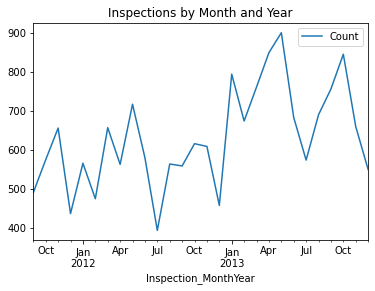

In [9]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

What do the results look like? 

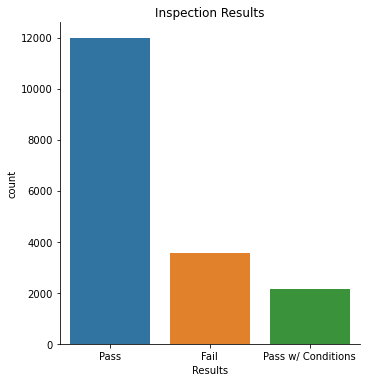

In [10]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

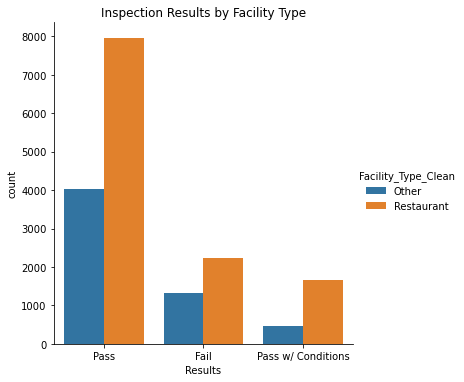

In [11]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

### Preprocess Data

In [12]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [13]:
chicago_inspections_2011_to_2013

,,Facility_Type,Risk,Inspection_Type,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,Grocery Store,Risk 3 (Low),Canvass,Pass,Other,0,0,2,0,0,0,0,2.000000,1,44-33,19.0,Retail Food Establishment,RENEW,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
507211,PANERA BREAD,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,3,0,0,0,0,2.000000,1,50-23,24.0,Retail Food Establishment,RENEW,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
507212,LITTLE QUIAPO RESTAURANT,Restaurant,Risk 1 (High),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.000000,1,50-25,17.0,Retail Food Establishment,RENEW,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
507216,SERGIO'S TAQUERIA PIZZA INC.,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,6,0,0,0,0,2.000000,1,39-48,17.0,Retail Food Establishment,RENEW,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
507219,TARGET STORE # T-2079,Restaurant,Risk 2 (Medium),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.000000,1,40-18,24.0,Retail Food Establishment,RENEW,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393258,CIAO BELLA CAFE,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,6,1,0,2,6,0.452055,0,49-36,24.0,Retail Food Establishment,ISSUE,0.726027,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,25.370000,7.963333,0.776667,10.537839,1.376266,21.726951,0
1395218,Christian Fields Style Bar,Restaurant,Risk 2 (Medium),Canvass,Pass,Restaurant,0,0,4,0,0,1,4,1.200000,0,20-18,3.0,Retail Food Establishment,RENEW,4.120548,0,0,0,0,0,1,0,0,0,0,0,0,0.000100,34.586667,9.820000,0.676667,56.680038,19.736283,32.355622,0
1395224,W CHICAGO - LAKESHORE,Restaurant,Risk 1 (High),Canvass,Pass w/ Conditions,Restaurant,3,3,5,0,0,0,0,2.000000,1,42-63,18.0,Retail Food Establishment,ISSUE,0.879452,0,0,0,0,0,0,0,0,0,0,0,0,0.000100,34.586667,9.820000,0.676667,10.937753,0.000002,19.213021,1


In [14]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [15]:
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

## 3. Fit Models

In [16]:
#This is importing the required packages and functions for running all three models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [17]:
#Set the seed
np.random.seed(12345)

### 3.1 Data Splitting

In [18]:
#Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, test_size=0.20, stratify=y)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size = .75, test_size = .25, stratify = y_train)

### 3.2 Model 1 - Logistic Regression

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

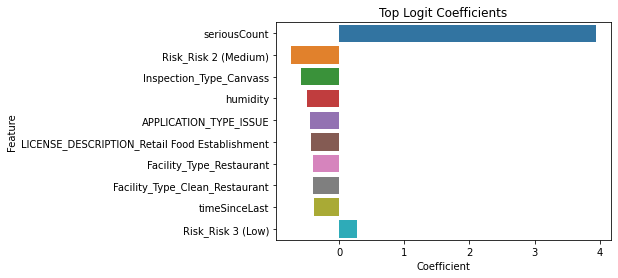

In [19]:
#Logistic Regression Model
logit_reg = LogisticRegression()
logit_model = logit_reg.fit(X_train, y_train.ravel())
y_pred = logit_model.predict(X_validate)
#Handling the Data for the Logistic Regression Model
logit_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logit_model.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])
#Visualizing the Logistic Regression Model
sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

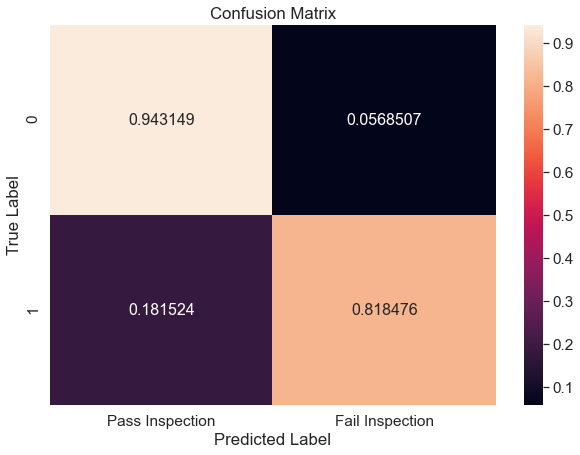

In [20]:
#Creating a Confusion Matrix
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))
df_cm = df_cm.rename(index=str, columns={0: "Pass Inspection", 1: "Fail Inspection"})
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
#Hyperparameter Tuning for Logistic Regression
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
               'fit_intercept': ['True', 'False'],
             'solver': ['liblinear', 'saga']}
logit_grid = GridSearchCV(logit_model, param_grid, cv=3)
logit_grid.fit(X_train, y_train)
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Validation Accuracy 0.9232527759634226


### 3.2 Model 2 - Support Vector Machine

In [37]:
## NE: WHERE IS THE HYPERTUNING FOR SVM? 
#Support Vector Machine Model
svm = SVC()
svm_model = svm.fit(X_train, y_train.ravel())
y_pred = svm_model.predict(X_validate)

svm = svm.SVC(kernel='linear')

AttributeError: 'SVC' object has no attribute 'SVC'

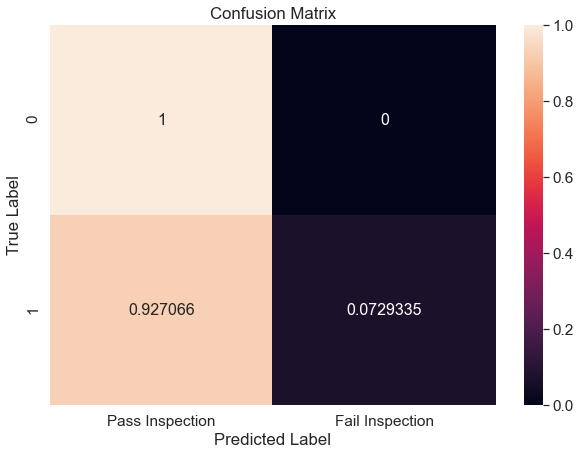

In [38]:
#Confusion Matrix
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))
df_cm = df_cm.rename(index=str, columns={0: "Pass Inspection", 1: "Fail Inspection"})
#Visualization
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Hyperparameter Tuning for SVC 
param_grid = {'C': [0.1, 1, 10, 100, 1000]}#,
              #'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            #  'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

### 3.2 Model 3 - Decision Tree

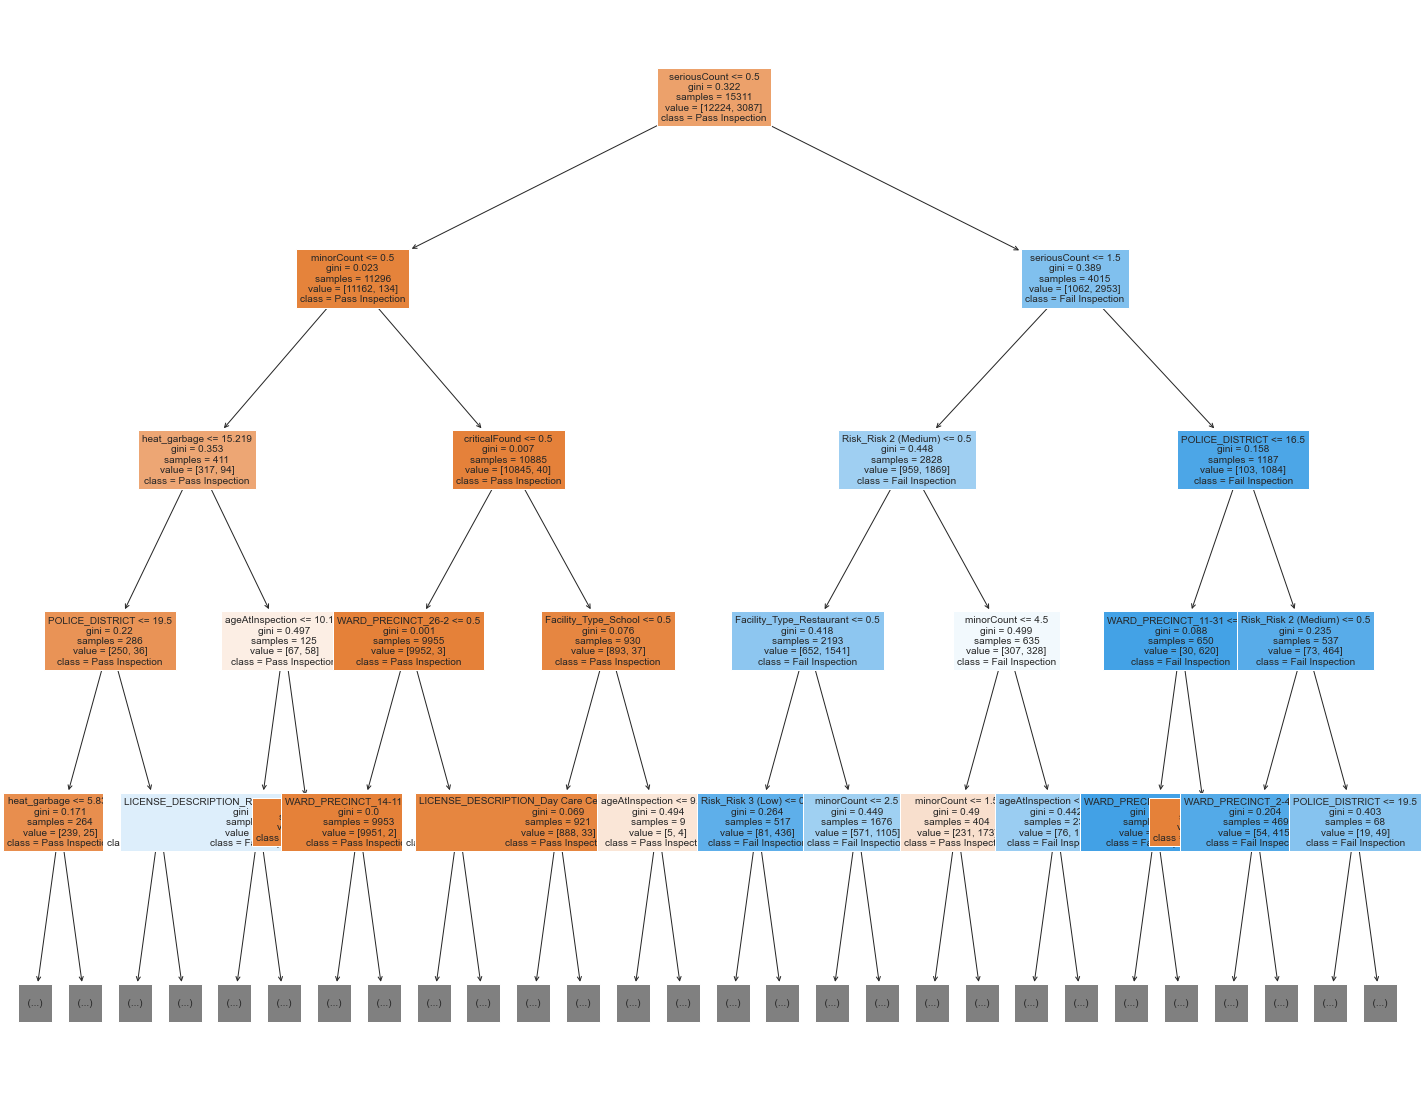

In [45]:
#Decision Tree Model
#Creating a Decision Tree Classifier
dt_classifier = tree.DecisionTreeClassifier(criterion='gini',
                       splitter='best',
                       max_depth=5,
                       min_samples_split=2,
                       min_samples_leaf=1,
                       min_weight_fraction_leaf=0.0,
                       max_features=None,
                       max_leaf_nodes=None,
                       min_impurity_decrease=1e-07,
                       random_state = 12345) #random seed
#Cross Validation
scores = cross_val_score(dt_classifier, X, y, cv=5)
scores
scores.mean()
dt_classifier.fit(X, y)
#Visualization
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=X.columns,  
                   class_names=["Pass Inspection", "Fail Inspection"],
                   filled=True,
                  fontsize = 10,
                  max_depth = 4)

In [64]:
#Hypertuning for Decision Tree
param_grid3 = {'min_samples_split': np.arange(2, 10), 'min_samples_leaf': 
np.arange(.05, .2), 'max_leaf_nodes': np.arange(2, 30)}
cv_dtc = GridSearchCV(estimator = dt_classifier, param_grid = param_grid3, cv = 3, 
scoring = accuracy_score, refit='precision', n_jobs=-1)
print(np.arange.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(cv_dtc, y_validate))

AttributeError: 'builtin_function_or_method' object has no attribute 'cv_results_'

### 3.3 Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

### Accuracy
Accuracy is an expression of ratio of correct observations relative to incorrect observations.
Accuracy is defined as: 

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

In [24]:
range(len(y_pred))

range(0, 3062)

In [25]:
## NE: UPDATE THIS ONCE THE EARLIER MODELS HAVE BEEN HYPERTUNED AND DEAL WITH IMBALANCED SAMPLE (MORE PASS THAN FAIL)

#Initialize 4 objects as 0, and then will iterate through vector of predictions to calc our TP, FP, etc. 
#each one of these is in one quadrant of the confusion matrix 
##create list with 4 validation metrics, - run for loop

TP = 0
FP = 0
TN = 0
FN = 0

##looping through for each i, i is a convention for item in a list - so for each item in this list of predicted values 

for i in range(len(y_pred)):
    ##if validate and predict both equal 1 
    if y_validate[i]==y_pred[i]==1:
       TP += 1
    ##we predict it equals 1 but the actual/validate does not equal 1 
    if y_pred[i]==1 and y_validate[i]!=y_pred[i]:
       FP += 1
    ##if validate and prediction equal 0 (if predict 0 and actually is 0)
    if y_validate[i]==y_pred[i]==0:
       TN += 1
    ##if predicted value is 0 and actual/validate is not
    if y_pred[i]==0 and y_pred[i]!=y_validate[i]:
       FN += 1

In [26]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

Accuracy is 0.8131939908556499


### Recall
Recall is defined as:

$$
Recall = \frac{TP}{TP + FN}
$$

In [27]:
recall = TP/(TP + FN)
print("Recall is", recall)

Recall is 0.07293354943273905


### Precision
Precision is a measure of how well calibrated predictions are. Precision is defined as: 

$$
Precision = \frac{TP}{TP + FP}
$$

In [28]:
precision = TP/(TP + FP)
print("Precision is", precision)

Precision is 1.0


### F1 Score
The precision-recall tradeoff can be managed in a few different ways. One popular metric is the F1 score. F1 Score is defined as:

$$
F1 = 2 * \frac{precision * recall}{precision + recall}
$$

In [29]:
f1 = 2 * (precision * recall)/(precision + recall)
print("F1 Score is", f1)

F1 Score is 0.13595166163141995


## 4. Policy Simulation

### 4.1 Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

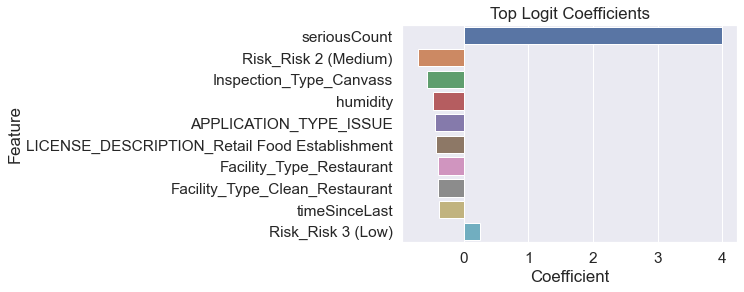

In [30]:
sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

dt_classifier
logit_model 
svm_model 

In [33]:
logit_model.coef_

##FROM STACKOVERFLOW - MODIFY 
importance = logistic_model.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

LogisticRegression()

In [37]:
##EG: ASK KQ IF CAN USE KERNEL LINEAR FOR SVM
svm_model.coef_

AttributeError: coef_ is only available when using a linear kernel

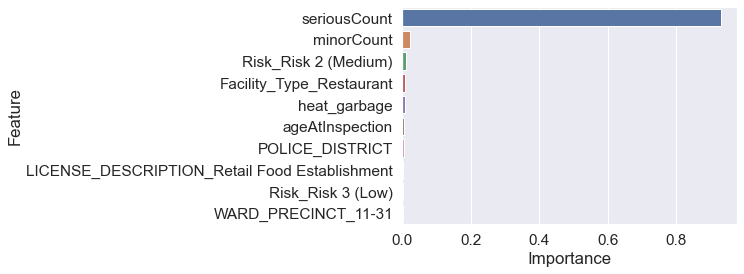

In [36]:
##decision tree classifier feature importance plot 
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(dt_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

### 4.2 Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

### 4.3 Predict on Data with Unseen Labels

In [ ]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & ....columns]

## 5. Discussion Questions

### 5.1 *Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?*

### 5.2 *Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?* 